In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('C:\\ml\\train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived

In [30]:
y.shape

(891,)

In [29]:
y.sum()

342

In [6]:
X = pd.get_dummies(X)

In [7]:
X = X.fillna({'Age': X.Age.median()})

In [8]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
X_train.shape

(668, 10)

In [12]:
X_test.shape

(223, 10)

In [14]:
clf_rf = RandomForestClassifier()

In [15]:
params = {'n_estimators': range(20, 31, 2), 'criterion': ['gini', 'entropy'], 'max_depth': range(5, 16, 2)}

In [16]:
grid_search_cv_clf = GridSearchCV(clf_rf, params, cv=5)

In [17]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [18]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 20}

In [19]:
best_clf = grid_search_cv_clf.best_estimator_

In [34]:
X_test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3,28.0,1,1,15.2458,0,1,1,0,0
439,2,31.0,0,0,10.5000,0,1,0,0,1
840,3,20.0,0,0,7.9250,0,1,0,0,1
720,2,6.0,0,1,33.0000,1,0,0,0,1
39,3,14.0,1,0,11.2417,1,0,1,0,0
290,1,26.0,0,0,78.8500,1,0,0,0,1
300,3,28.0,0,0,7.7500,1,0,0,1,0
333,3,16.0,2,0,18.0000,0,1,0,0,1
208,3,16.0,0,0,7.7500,1,0,0,1,0
136,1,19.0,0,2,26.2833,1,0,0,0,1


In [32]:
best_clf.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [21]:
best_clf.score(X_test, y_test)

0.8161434977578476

In [22]:
feature_importances = best_clf.feature_importances_

In [23]:
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})

In [24]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.235405
5,Sex_female,0.220792
4,Fare,0.157330
0,Pclass,0.135034
1,Age,0.119944
2,SibSp,0.054783
3,Parch,0.041377
7,Embarked_C,0.019722
9,Embarked_S,0.009291
8,Embarked_Q,0.006322


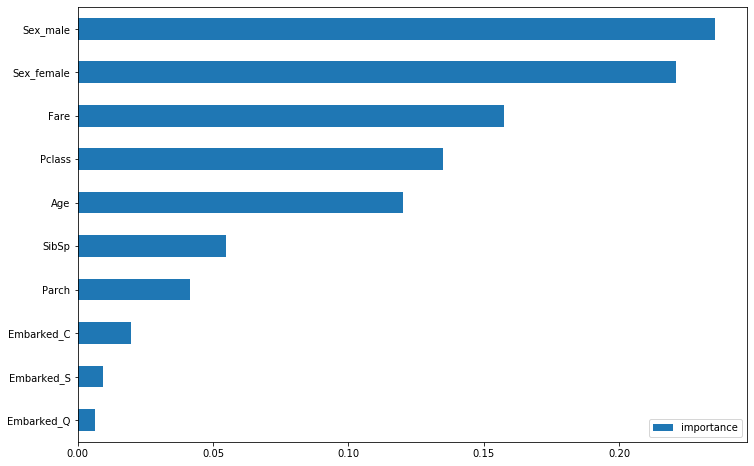

In [25]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))